In [1]:
import os

import numpy as np

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs

import matplotlib.pyplot as plt

plt.style.use("ggplot")

from tqdm import tqdm

In [2]:
datatype = "linker"
prefix = "DB_10042"

In [3]:
filepath = f"../data/{prefix}_{datatype}_smiles.txt"

with open(filepath, "r") as f:
    lines = f.readlines()
    
smiles = [l.strip() for l in lines]
smiles

['[O-]C(=O)c1ccncc1',
 'Cc1c(COc2cccc(c2)C(=O)[O-])c(C)c(c(c1COc1cccc(c1)C(=O)[O-])C)COc1cccc(c1)C(=O)[O-]',
 '[O-]C(=O)c1cc(cc(c1)c1ccncc1)C(=O)[O-]',
 '[N]1CC[N]CC1',
 '[O-]C(=O)c1ccc(cc1)C(=O)[O-]',
 '[O-]C(=O)c1ccc(cc1)C(=O)[O-]',
 'n1ccc(cc1)c1ccncc1',
 'Cc1nc(c([nH]1)C(=O)[O-])C(=O)[O-]',
 '[O-]C(=O)C(=O)[O-]',
 'N1=NN=C([N]1)c1ccc(cc1)[Si](c1ccc(cc1)C1=NN=N[N]1)(c1ccc(cc1)C1=NN=N[N]1)c1ccc(cc1)C1=NN=N[N]1',
 '[N]1N=NC(=N1)c1ccc(cc1)[Si](c1ccc(cc1)C1=NN=N[N]1)(c1ccc(cc1)C1=NN=N[N]1)c1ccc(cc1)C1=NN=N[N]1',
 '[O-]C(=O)c1ccc(cc1)C(=O)[O-]',
 '[O]P(=O)(O)[O]',
 '[O]P(=O)([O])O',
 '[BH][BH]1B(C#Cc2cc(cc(c2)C(=O)[O-])C(=O)[O-])[BH]2B[BH]3[BH]4[BH]1BC2C34',
 '[O-]C(=O)c1cc(C#CB2BB[BH]2[BH]2BC3C4[BH]2B[BH]34)cc(c1)C(=O)[O-]',
 '[O-]C(=O)c1cc(C#CB2B[BH]3[BH]2[BH]2[BH]3C3C4[BH]2B[BH]34)cc(c1)C(=O)[O-]',
 '[O-]C(=O)c1cc(C#C[B]23BBB[CH]BC(B2)[BH]2[BH]3B2)cc(c1)C(=O)[O-]',
 '[O-]C(=O)c1cc(C#C[B]23BC([BH]4[BH]2B4)BC2[BH]4[BH]3[BH]24)cc(c1)C(=O)[O-]',
 '[O-]C(=O)c1cc(C#C[B]23BC([BH]4[BH]3B4)BC3

In [4]:
fps = []

for s in smiles:
    mol = Chem.MolFromSmiles(s, sanitize=False)
    Chem.SanitizeMol(
        mol,
        Chem.SanitizeFlags.SANITIZE_FINDRADICALS|Chem.SanitizeFlags.SANITIZE_KEKULIZE|Chem.SanitizeFlags.SANITIZE_SETAROMATICITY|Chem.SanitizeFlags.SANITIZE_SETCONJUGATION|Chem.SanitizeFlags.SANITIZE_SETHYBRIDIZATION|Chem.SanitizeFlags.SANITIZE_SYMMRINGS
    )
    
    fps.append(AllChem.GetMorganFingerprintAsBitVect(mol, 2))

RDKit WARNING: [19:04:33] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [19:04:33] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [19:04:38] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [19:04:38] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [19:04:40] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [19:04:40] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


In [5]:
similarities = np.zeros((len(fps), len(fps)))

for fp_i in tqdm(range(len(fps))):
    similarity = DataStructs.BulkTanimotoSimilarity(fps[fp_i], fps[:(fp_i + 1)])
    similarities[fp_i, :(fp_i + 1)] = similarity
    similarities[:(fp_i + 1), fp_i] = similarity

100%|██████████| 15267/15267 [00:26<00:00, 566.79it/s]


In [6]:
similarities_check = np.zeros((len(fps), len(fps)))

for fp_i1 in tqdm(range(len(fps))):
    for fp_i2 in range(len(fps)):
        s = DataStructs.TanimotoSimilarity(fps[fp_i1], fps[fp_i2])
        similarities_check[fp_i1, fp_i2] = s

100%|██████████| 15267/15267 [08:42<00:00, 29.24it/s]


In [7]:
np.isclose(similarities, similarities_check).all()

True

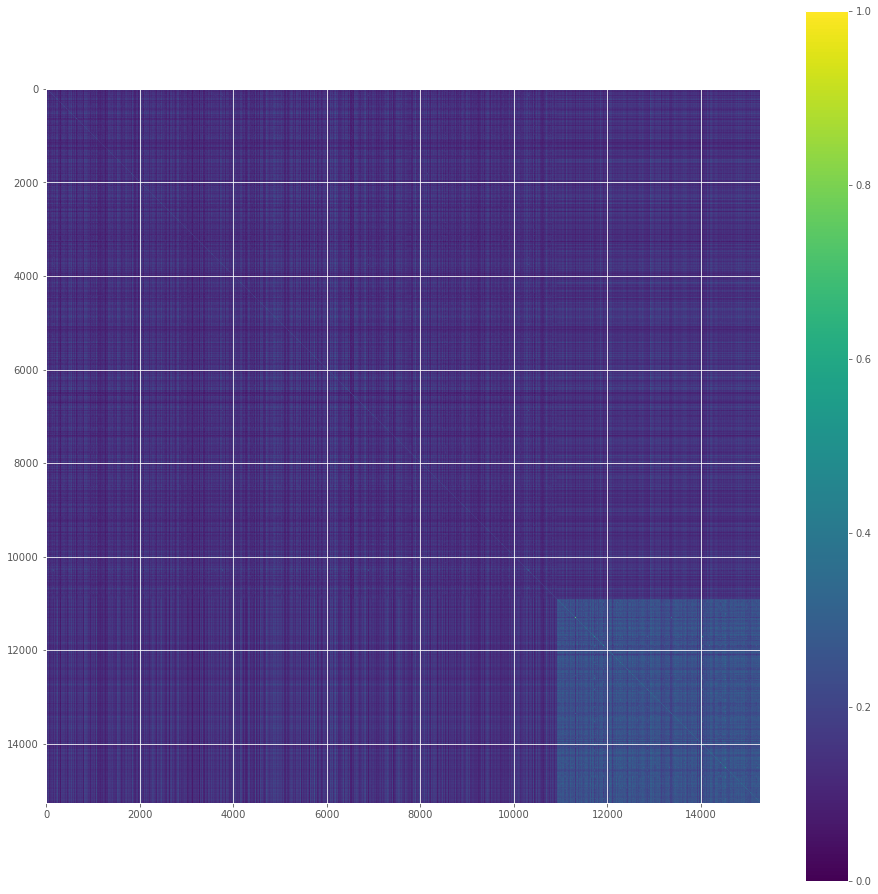

In [8]:
plt.figure(figsize=(16, 16))
plt.imshow(similarities)
plt.colorbar();

In [9]:
np.save(f"../data/{prefix}_{datatype}_sims.npy", similarities)